Muestra

In [11]:
b=c(20.9,18.2,20,17.3,19.6,13.6,24.9,26.9,23.5,21.8,17,20.4,24.6,22.6,21.2,19.6,14.6,24.4,21.8,18.4,24.8,28.5,11.9,10,25.7,27.2,24.4,30.1,21.6,26,14.6,26.1,22.1,8.4,16.4,19.6,19.6,21.5,20.2,25.2,26.7,22.3,22.9,19.9,16.5,14.1,20.4,16.6,19.1,25.5,16.2,24.7,20,28.4,24.4,15.8,25.6,22.5,17.2,15.8,15.1,16.2,19.9,27.3,22.3,19.3,11.7,14.4,24.5,21.6,12.4,15.9,23.5,22.8,26.6,31,22.2,21.7,25.1,28.8,22.8,21.3,24.5,13.8,14.3,23.6,13.3,28.6,22.9,13.7,15.4,13.1,28.8,11.2,22.3,21.9,11.2,21.2,18.7,15)
n=length(b)

DE=sd(b)
RI =(summary(b)[5]-summary(b)[2])/1.349
A=min(DE,RI)

h.S=(0.9*A)/(n^(1/5));h.S

[1] 1.809964

# Estimación de Kernell para dominios acotados

Este método se utiliza en el caso de querer estimar densidades de muestras positivas.

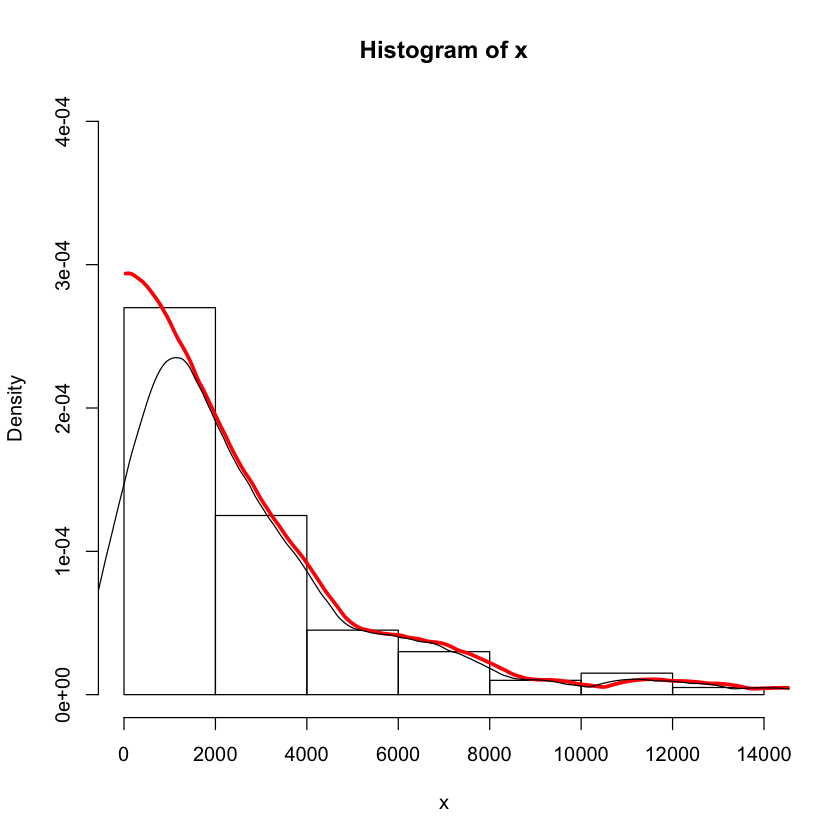

In [12]:
x<- rexp(100,1/2500)
h2=density(x,kernel="epanechnikov")$bw             #Densidad con la muestra sin ampliar
y=c(-x,x)
fe=2*density(y,kernel="epanechnikov", bw=h2)$y
xp=density(y,kernel="epanechnikov")$x              #Densidad sobre la muestra ampliada

fe2=rep(0,length(xp)/2)
xp2= rep(0,length(xp)/2)

fe[xp>0]-> fe2
xp[xp>0]-> xp2
hist(x,prob="T", ylim=c(0,0.0004))
lines(xp2,fe2,col=2,lwd=3)
lines(density(x,kernel="epanechnikov"))

# Bandas de confianza

La varianza de f estimado depende de la varianza de f, por lo cual se estima.

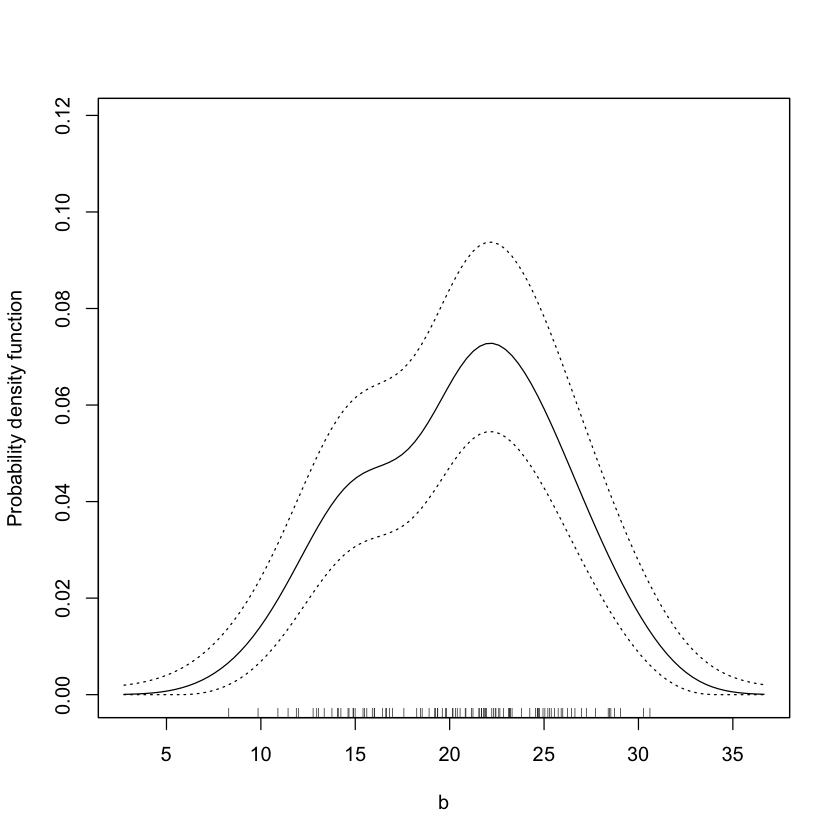

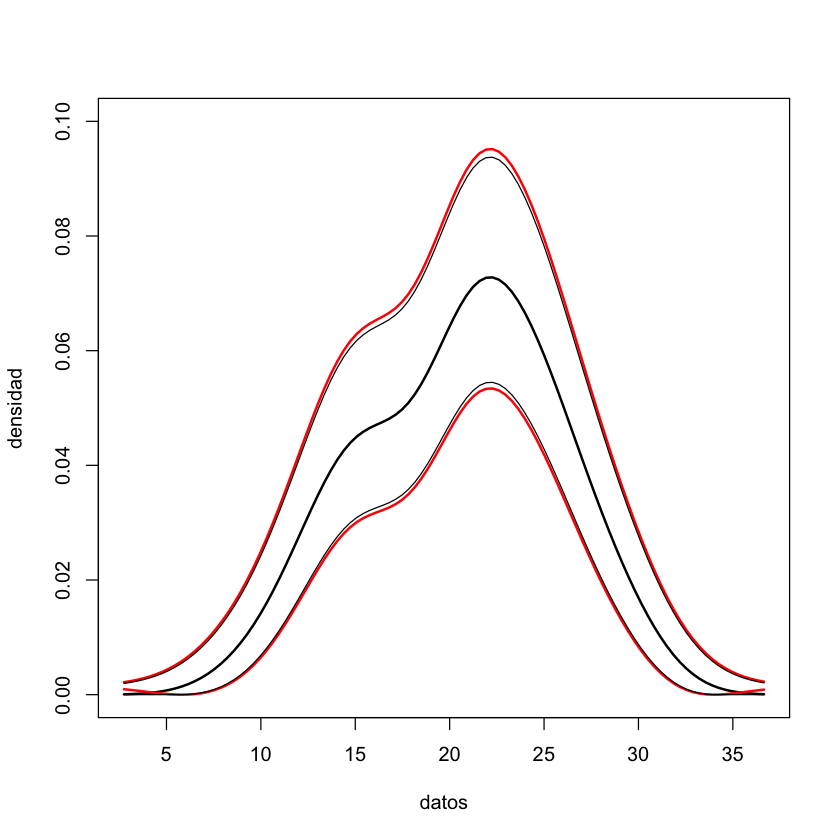

In [13]:
library(sm)
banda = sm.density(b,display="se")
# re=raìz de estimaciones de la densidad
fe=banda$estimate
re=sqrt(fe)
#Puntos evaluados
xe=banda$eval.points
# Rk = R(K) = int K^2(u)du, en la normal
Rk= 1/(2*sqrt(pi))
#rve=varianza de las estimaciones
rve=sqrt(Rk/(4*n*h.S))

# Límites de la estimación de la raíz de f estim
li=re-1.96*rve;ls=re+1.96*rve

plot(xe,fe,lwd=2,type="l", ylim=c(0,0.1),xlab="datos", ylab="densidad")
lines(xe,li^2, type="l",col=2,lwd=2)
lines(xe,ls^2, type="l",col=2,lwd=2)

lines(xe,(banda$lower));lines(xe,banda$upper)

# Prueba de normalidad

Si la línea estimada se sale de la región definida por las bandas, se rechaza la hipótesis de densidad normal. Bandas de referencia normal.

In [14]:
# Estimación de la densidad
fe=density(b,bw=h.S)
#Puntos evaluados en la estimación de f
b2=fe$x
# Estimaciones de mu y sigma
muE = mean(b);muE; VarE=var(b);VarE
#Esperanza y varianza estimada de f estimad
E.fe=dnorm(b2,mean=muE, sd=sqrt(VarE+h.S^2));E.fe
Var.fe=1/n*(1/sqrt(4*pi*h.S^2)) * dnorm(b2,mean=muE, sd=sqrt(VarE+0.5*h.S^2/2))-E.fe^2;Var.fe #Verificar f_N(0;0,2h^2)

[1] 20.497

[1] 25.51848

[1] 0.0003586184 0.0003731725 0.0003882595 0.0004038963 0.0004201002
  [6] 0.0004368893 0.0004542816 0.0004722959 0.0004909516 0.0005102681
 [11] 0.0005302657 0.0005509649 0.0005723869 0.0005945533 0.0006174861
 [16] 0.0006412081 0.0006657422 0.0006911121 0.0007173420 0.0007444566
 [21] 0.0007724810 0.0008014410 0.0008313629 0.0008622736 0.0008942004
 [26] 0.0009271712 0.0009612146 0.0009963596 0.0010326359 0.0010700736
 [31] 0.0011087035 0.0011485569 0.0011896657 0.0012320624 0.0012757800
 [36] 0.0013208522 0.0013673132 0.0014151976 0.0014645410 0.0015153791
 [41] 0.0015677485 0.0016216862 0.0016772298 0.0017344176 0.0017932883
 [46] 0.0018538811 0.0019162359 0.0019803931 0.0020463936 0.0021142788
 [51] 0.0021840908 0.0022558720 0.0023296654 0.0024055145 0.0024834633
 [56] 0.0025635562 0.0026458382 0.0027303545 0.0028171511 0.0029062741
 [61] 0.0029977702 0.0030916864 0.0031880702 0.0032869692 0.0033884317
 [66] 0.0034925060 0.0035992410 0.0037086857 0.0038208894 0.0039359016
 [71] 0.0040537721 0.0041745509 0.0042982881 0.0044250341 0.0045548393
 [76] 0.0046877541 0.0048238292 0.0049631152 0.0051056627 0.0052515224
 [81] 0.0054007448 0.0055533804 0.0057094795 0.0058690925 0.0060322693
 [86] 0.0061990597 0.0063695134 0.0065436795 0.0067216071 0.0069033446
 [91] 0.0070889403 0.0072784419 0.0074718966 0.0076693511 0.0078708516
 [96] 0.0080764435 0.0082861716 0.0085000802 0.0087182127 0.0089406116
[101] 0.0091673187 0.0093983748 0.0096338201 0.0098736933 0.0101180324
[106] 0.0103668743 0.0106202548 0.0108782083 0.0111407682 0.0114079666
[111] 0.0116798341 0.0119564002 0.0122376927 0.0125237382 0.0128145615
[116] 0.0131101859 0.0134106333 0.0137159235 0.0140260750 0.0143411042
[121] 0.0146610259 0.0149858529 0.0153155959 0.0156502640 0.0159898641
[126] 0.0163344008 0.0166838769 0.0170382929 0.0173976470 0.0177619354
[131] 0.0181311516 0.0185052870 0.0188843306 0.0192682689 0.0196570858
[136] 0.0200507630 0.0204492793 0.0208526111 0.0212607321 0.0216736132
[141] 0.0220912228 0.0225135264 0.0229404868 0.0233720640 0.0238082151
[146] 0.0242488943 0.0246940531 0.0251436399 0.0255976003 0.0260558767
[151] 0.0265184088 0.0269851332 0.0274559834 0.0279308900 0.0284097806
[156] 0.0288925795 0.0293792083 0.0298695853 0.0303636259 0.0308612422
[161] 0.0313623436 0.0318668361 0.0323746229 0.0328856040 0.0333996766
[166] 0.0339167347 0.0344366692 0.0349593684 0.0354847173 0.0360125982
[171] 0.0365428903 0.0370754702 0.0376102112 0.0381469844 0.0386856577
[176] 0.0392260963 0.0397681630 0.0403117176 0.0408566175 0.0414027176
[181] 0.0419498702 0.0424979252 0.0430467301 0.0435961301 0.0441459683
[186] 0.0446960853 0.0452463197 0.0457965083 0.0463464855 0.0468960842
[191] 0.0474451351 0.0479934674 0.0485409086 0.0490872846 0.0496324198
[196] 0.0501761371 0.0507182582 0.0512586036 0.0517969927 0.0523332436
[201] 0.0528671737 0.0533985997 0.0539273371 0.0544532013 0.0549760068
[206] 0.0554955678 0.0560116983 0.0565242118 0.0570329221 0.0575376427
[211] 0.0580381873 0.0585343700 0.0590260050 0.0595129071 0.0599948917
[216] 0.0604717749 0.0609433735 0.0614095054 0.0618699894 0.0623246455
[221] 0.0627732951 0.0632157607 0.0636518666 0.0640814387 0.0645043043
[226] 0.0649202931 0.0653292363 0.0657309673 0.0661253220 0.0665121382
[231] 0.0668912562 0.0672625191 0.0676257724 0.0679808642 0.0683276458
[236] 0.0686659713 0.0689956978 0.0693166855 0.0696287980 0.0699319022
[241] 0.0702258684 0.0705105705 0.0707858860 0.0710516961 0.0713078857
[246] 0.0715543439 0.0717909633 0.0720176410 0.0722342779 0.0724407792
[251] 0.0726370544 0.0728230172 0.0729985857 0.0731636826 0.0733182350
[256] 0.0734621745 0.0735954374 0.0737179646 0.0738297017 0.0739305990
[261] 0.0740206118 0.0740996998 0.0741678279 0.0742249656 0.0742710876
[266] 0.0743061732 0.0743302067 0.0743431775 0.0743450797 0.0743359125
[271] 0.0743156800 0.0742843912 0.0742420600 0.0741887054 0.0741243513
[276] 0.0740490261 0.0739627637 0.0738656023 0.0737575851 0.0736387603
[281] 0.0735091806 0.07336

[1]  2.267061e-07  2.318502e-07  2.367962e-07  2.415050e-07  2.459339e-07
  [6]  2.500364e-07  2.537618e-07  2.570552e-07  2.598568e-07  2.621018e-07
 [11]  2.637202e-07  2.646363e-07  2.647682e-07  2.640275e-07  2.623190e-07
 [16]  2.595403e-07  2.555810e-07  2.503225e-07  2.436375e-07  2.353893e-07
 [21]  2.254313e-07  2.136066e-07  1.997469e-07  1.836724e-07  1.651909e-07
 [26]  1.440969e-07  1.201712e-07  9.317968e-08  6.287299e-08  2.898532e-08
 [31] -8.766351e-09 -5.068320e-08 -9.708555e-08 -1.483138e-07 -2.047297e-07
 [36] -2.667172e-07 -3.346837e-07 -4.090611e-07 -4.903075e-07 -5.789077e-07
 [41] -6.753755e-07 -7.802542e-07 -8.941185e-07 -1.017576e-06 -1.151268e-06
 [46] -1.295873e-06 -1.452106e-06 -1.620721e-06 -1.802514e-06 -1.998323e-06
 [51] -2.209032e-06 -2.435570e-06 -2.678915e-06 -2.940096e-06 -3.220195e-06
 [56] -3.520348e-06 -3.841749e-06 -4.185651e-06 -4.553368e-06 -4.946278e-06
 [61] -5.365828e-06 -5.813530e-06 -6.290970e-06 -6.799808e-06 -7.341780e-06
 [66] -7.918701e-06 -8.532470e-06 -9.185068e-06 -9.878566e-06 -1.061512e-05
 [71] -1.139700e-05 -1.222654e-05 -1.310619e-05 -1.403851e-05 -1.502615e-05
 [76] -1.607188e-05 -1.717858e-05 -1.834923e-05 -1.958695e-05 -2.089496e-05
 [81] -2.227661e-05 -2.373539e-05 -2.527490e-05 -2.689887e-05 -2.861119e-05
 [86] -3.041586e-05 -3.231705e-05 -3.431904e-05 -3.642627e-05 -3.864335e-05
 [91] -4.097502e-05 -4.342617e-05 -4.600185e-05 -4.870728e-05 -5.154784e-05
 [96] -5.452904e-05 -5.765661e-05 -6.093639e-05 -6.437442e-05 -6.797691e-05
[101] -7.175022e-05 -7.570090e-05 -7.983566e-05 -8.416138e-05 -8.868513e-05
[106] -9.341413e-05 -9.835578e-05 -1.035177e-04 -1.089075e-04 -1.145333e-04
[111] -1.204030e-04 -1.265249e-04 -1.329074e-04 -1.395592e-04 -1.464888e-04
[116] -1.537053e-04 -1.612176e-04 -1.690350e-04 -1.771668e-04 -1.856223e-04
[121] -1.944114e-04 -2.035436e-04 -2.130288e-04 -2.228770e-04 -2.330983e-04
[126] -2.437028e-04 -2.547008e-04 -2.661026e-04 -2.779187e-04 -2.901596e-04
[131] -3.028358e-04 -3.159578e-04 -3.295364e-04 -3.435821e-04 -3.581056e-04
[136] -3.731176e-04 -3.886286e-04 -4.046493e-04 -4.211903e-04 -4.382619e-04
[141] -4.558747e-04 -4.740390e-04 -4.927650e-04 -5.120628e-04 -5.319423e-04
[146] -5.524135e-04 -5.734858e-04 -5.951689e-04 -6.174717e-04 -6.404035e-04
[151] -6.639729e-04 -6.881884e-04 -7.130582e-04 -7.385901e-04 -7.647917e-04
[156] -7.916703e-04 -8.192325e-04 -8.474850e-04 -8.764336e-04 -9.060839e-04
[161] -9.364411e-04 -9.675098e-04 -9.992942e-04 -1.031798e-03 -1.065024e-03
[166] -1.098975e-03 -1.133653e-03 -1.169058e-03 -1.205193e-03 -1.242057e-03
[171] -1.279649e-03 -1.317968e-03 -1.357012e-03 -1.396778e-03 -1.437264e-03
[176] -1.478464e-03 -1.520373e-03 -1.562987e-03 -1.606298e-03 -1.650299e-03
[181] -1.694982e-03 -1.740338e-03 -1.786357e-03 -1.833027e-03 -1.880339e-03
[186] -1.928278e-03 -1.976832e-03 -2.025986e-03 -2.075726e-03 -2.126034e-03
[191] -2.176895e-03 -2.228290e-03 -2.280200e-03 -2.332605e-03 -2.385486e-03
[196] -2.438820e-03 -2.492586e-03 -2.546759e-03 -2.601316e-03 -2.656232e-03
[201] -2.711481e-03 -2.767035e-03 -2.822869e-03 -2.878953e-03 -2.935257e-03
[206] -2.991754e-03 -3.048411e-03 -3.105197e-03 -3.162081e-03 -3.219030e-03
[211] -3.276009e-03 -3.332987e-03 -3.389926e-03 -3.446794e-03 -3.503553e-03
[216] -3.560169e-03 -3.616604e-03 -3.672821e-03 -3.728783e-03 -3.784452e-03
[221] -3.839790e-03 -3.894760e-03 -3.949322e-03 -4.003438e-03 -4.057070e-03
[226] -4.110177e-03 -4.162722e-03 -4.214666e-03 -4.265969e-03 -4.316593e-03
[231] -4.366500e-03 -4.415652e-03 -4.464009e-03 -4.511534e-03 -4.558191e-03
[236] -4.603941e-03 -4.648749e-03 -4.692577e-03 -4.735391e-03 -4.777156e-03
[241] -4.817837e-03 -4.857400e-03 -4.895813e-03 -4.933043e-03 -4.969060e-03
[246] -5.003832e-03 -5.037330e-03 -5.069525e-03 -5.100391e-03 -5.129899e-03
[251] -5.158026e-03 -5.184745e-03 -5.210035e-03 -5.233872e-03 -5.256236e-03
[256] -5.277107e-03 -5.296468e-03 -5.314299e-03 -5.330587e-03 -5.345316e-03
[261] -5.358473e-03 -5.370047e-03 -5.380027e-03 -5

Bandas de confianza basadas en la esperanza y varianza estimadas de la densidad estimada.

In [15]:
#Bandas
li1=E.fe-1.96*sqrt(Var.fe);li1[li1<0]<-0
li2=E.fe+1.96*sqrt(Var.fe)

Warning message in sqrt(Var.fe):
“NaNs produced”Warning message in sqrt(Var.fe):
“NaNs produced”

Gráficas de las bandas de confianza.

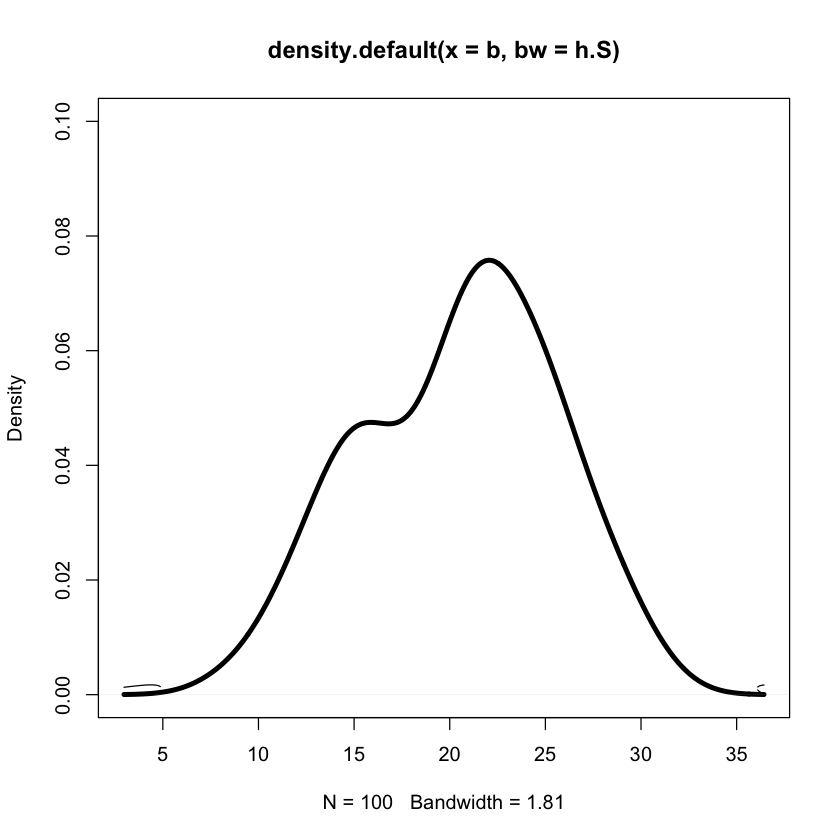

In [16]:
#Gráfica
plot(fe,lwd=4,ylim=c(0,0.1))
lines(b2,li1)
lines(b2,li2)

## Verificación del procedimiento 

Se verifica utilizando el paquete sm.  
Esta prueba es muy subjetiva, la decisión depende del conocimiento del problema.  
En este caso la hipótesis de función de densidad normal se descarta.

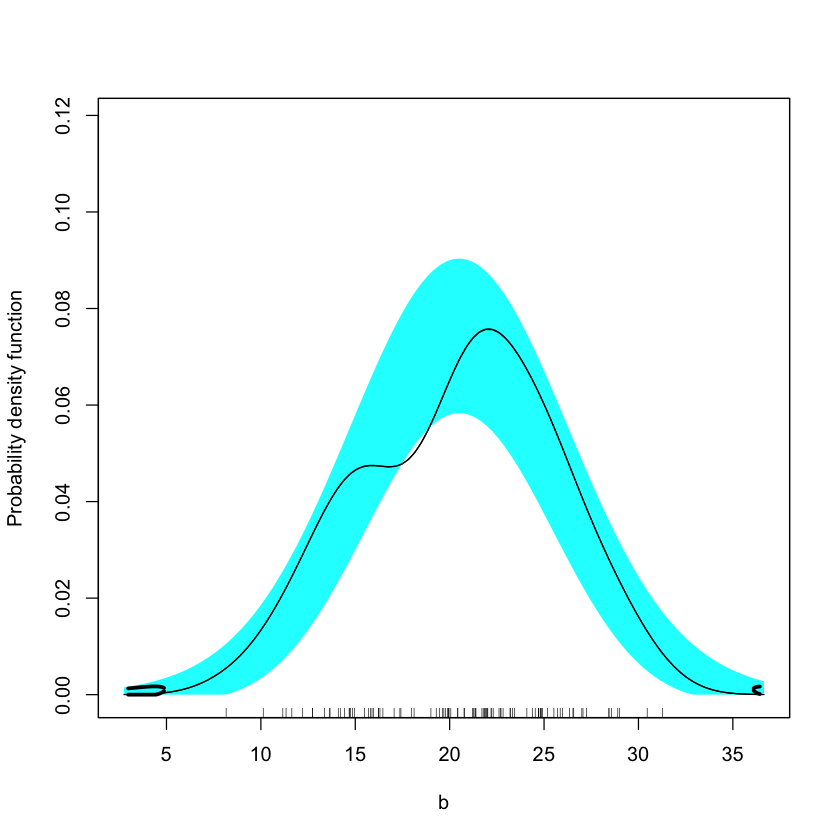

In [17]:
dNorm=sm.density(b,model="normal",h=h.S)
lines(fe)
lines(b2,li1,lwd=3)
lines(b2,li2,lwd=3)
